In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.datasets import imdb
from keras import models, layers
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score, classification_report
from keras.preprocessing import text, sequence
import tensorflow as tf
warnings.filterwarnings('ignore')

In [0]:
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=10000)

In [38]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [39]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [41]:
max_len = len(imdb.get_word_index())

max_len

88584

In [42]:
length_checker = []
for i in x_train:
  max_len_result = len(i)
#   print(max_len_result)
  length_checker.append(max_len_result)
  
print(np.max(np.array(length_checker)))

2494


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen = 2500, padding='post')
x_val = sequence.pad_sequences(x_val, maxlen=2500, padding='post')

# set cross validation

In [44]:
x_train

array([[   1,   14,   22, ...,    0,    0,    0],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

In [45]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2019)

In [47]:
x_train.shape

(25000, 2500)

In [0]:
from keras import activations

In [0]:

def model_define():
  input_tensor = layers.Input(shape =(2500,))
  emb = layers.Embedding(10000+1, 256)(input_tensor)
  
  x = layers.Bidirectional(layers.CuDNNLSTM(128, return_sequences=True))(emb)
  x = layers.Conv1D(256, 7, padding='valid')(x)
  x = layers.LeakyReLU()(x)
  x_1 = layers.GlobalAvgPool1D()(x)
  x_2 = layers.GlobalMaxPool1D()(x)
  x_concat = layers.Concatenate()([x_1, x_2])
  x_out = layers.Dense(128)(x_concat)
  x_out = layers.LeakyReLU()(x_out)
  
  x_out = layers.Dense(128)(x_out)
  x_out = layers.LeakyReLU()(x_out)
  x_out = layers.Dense(1, activation='sigmoid')(x_out)
  
  model = models.Model(input_tensor, x_out)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [0]:
model = model_define()

In [51]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 2500)         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 2500, 256)    2560256     input_6[0][0]                    
__________________________________________________________________________________________________
bidirectional_6 (Bidirectional) (None, 2500, 256)    395264      embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 2494, 256)    459008      bidirectional_6[0][0]            
____________________________________________________________________________________________

In [53]:
cv_result = []
for ind, (train, test) in enumerate(cv.split(x_train, y_train)):
  feed_train = x_train[train]
  label_train = y_train[train]
  
  feed_test = x_train[test]
  label_test = y_train[test]
  
  print(feed_train.shape)
  print(label_train.shape)
  model = model_define()
  model.fit(feed_train, label_train, batch_size=128, epochs=1, validation_data=(feed_test, label_test))
  score = model.evaluate(feed_test, label_test)
  score_dict = {ind:score}
  cv_result.append(score_dict)
  print(score_dict)

(20000, 2500)
(20000,)
Train on 20000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 41s 8ms/step
{0: [0.2881704960227013, 0.8762]}
(20000, 2500)
(20000,)
Train on 20000 samples, validate on 5000 samples
Epoch 1/1
15104/20000 [=====================>........] - ETA: 57s - loss: 0.4445 - acc: 0.7726

KeyboardInterrupt: ignored

# TSNE

In [56]:
x_train.shape

(25000, 2500)

In [57]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [0]:
ind_word = {v:k for k, v in imdb.get_word_index().items()}

In [0]:
ind_word[0] = '<none>'

In [1]:
import keras
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

train,test = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
train_x,train_y = train
test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}

word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_x[0] ))

Using TensorFlow backend.


<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't yo

In [6]:
train_x.shape[0]

25000

In [0]:
data = []
for i in range(train_x.shape[0]):
  result = ' '.join(id_to_word[id] for id in train_x[i])
  data.append(result)

In [12]:
train_y

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
imdb_text = pd.DataFrame(data)
imdb_label = pd.DataFrame(train_y)

In [15]:
imdb_text.head()

,0
0,<START> this film was just brilliant casting <...
1,<START> big <UNK> big <UNK> bad music and a <U...
2,<START> this has to be one of the worst films ...
3,<START> the <UNK> <UNK> at <UNK> the <UNK> sor...
4,<START> worst <UNK> of my life br br i <UNK> t...


In [19]:
imdb_text[0].values

array(["<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [0]:
count_vec = CountVectorizer()

In [0]:
imdb_ngram = count_vec.fit_transform(imdb_text[0].values)

In [0]:
imdb_ngram = imdb_ngram.todense()

In [0]:
tsne = TSNE(n_components=2, perplexity=500, n_iter=3000)

In [0]:
tsne_result = tsne.fit_transform(imdb_ngram)

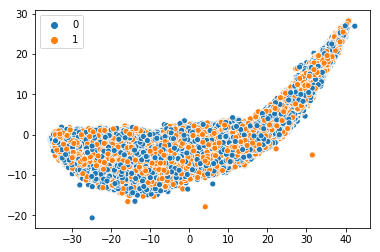

In [64]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=imdb_label.values.reshape(-1,))

In [0]:
tf_vec = TfidfVectorizer()

In [0]:
imdb_ngram = tf_vec.fit_transform(imdb_text[0].values)

In [0]:
imdb_ngram = imdb_ngram.todense()

In [0]:
tsne = TSNE(n_components=2, perplexity=500, n_iter=3000)

In [0]:
tsne_result = tsne.fit_transform(imdb_ngram)

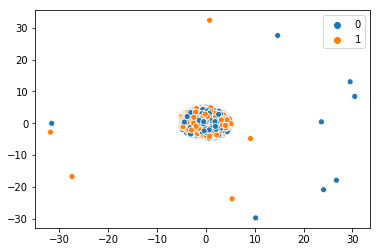

In [70]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=imdb_label.values.reshape(-1,))

In [0]:
trunked = TruncatedSVD(n_components=50)

In [0]:
trunked_result = trunked.fit_transform(imdb_ngram)

In [0]:
trunked_result

array([[ 3.44695810e+01, -1.24636684e+01,  2.77528062e+00, ...,
        -2.82463237e-01, -1.48447677e+00, -2.20131319e+00],
       [ 4.69300448e+01, -7.25409692e+00,  3.27223714e+00, ...,
        -1.90026669e+00, -8.10923973e-01, -4.05659422e-01],
       [ 2.30976056e+01, -7.68015061e+00,  2.66568012e+00, ...,
         1.67525990e+00,  7.98751491e-01,  8.26535170e-01],
       ...,
       [ 6.14835276e+01,  1.63731229e+00,  1.53892081e+00, ...,
         4.65814313e-01,  2.87646201e-01,  8.98759771e-01],
       [ 2.42881527e+01, -7.27181291e+00, -3.29841364e+00, ...,
         3.75675302e-02, -1.76721747e-01,  4.16157065e-01],
       [ 4.34106868e+01, -2.43572407e+00,  6.81491346e-01, ...,
        -1.71808567e-01, -7.54178236e-01, -1.34080971e+00]])

In [0]:
tsne_result = tsne.fit_transform(trunked_result)

In [0]:
tsne_result

array([[  7.543611 , -18.283476 ],
       [ -2.5071554,  -1.3852051],
       [ 15.087166 , -17.779764 ],
       ...,
       [-12.497238 ,   2.3742166],
       [  9.664089 , -19.188246 ],
       [ -3.2524378,  -4.9822984]], dtype=float32)

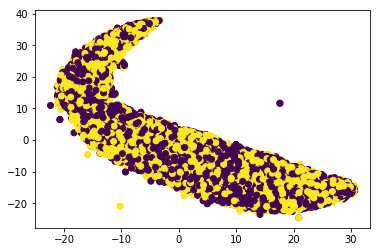

In [0]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=imdb_label.values.reshape(-1,))

In [0]:
imdb_label.values.reshape(-1,)

array([1, 0, 0, ..., 0, 1, 0])

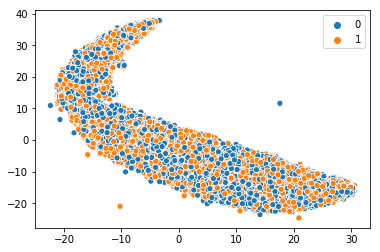

In [0]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=imdb_label.values.reshape(-1,))

In [0]:
count_vec = CountVectorizer(ngram_range=(1,3))

In [0]:
imdb_ngram = count_vec.fit_transform(imdb_text[0].values)

In [21]:
imdb_ngram

<25000x1549665 sparse matrix of type '<class 'numpy.int64'>'
	with 11881260 stored elements in Compressed Sparse Row format>

In [0]:
tsne = TSNE(n_components=2, perplexity=500)

In [23]:
tsne_result = tsne.fit_transform(imdb_ngram)

TypeError: ignored

In [0]:
trunked = TruncatedSVD(n_components=50)

In [0]:
trunked_result = trunked.fit_transform(imdb_ngram)

In [32]:
trunked_result

array([[ 3.44695810e+01, -1.24636684e+01,  2.77528062e+00, ...,
        -2.82463237e-01, -1.48447677e+00, -2.20131319e+00],
       [ 4.69300448e+01, -7.25409692e+00,  3.27223714e+00, ...,
        -1.90026669e+00, -8.10923973e-01, -4.05659422e-01],
       [ 2.30976056e+01, -7.68015061e+00,  2.66568012e+00, ...,
         1.67525990e+00,  7.98751491e-01,  8.26535170e-01],
       ...,
       [ 6.14835276e+01,  1.63731229e+00,  1.53892081e+00, ...,
         4.65814313e-01,  2.87646201e-01,  8.98759771e-01],
       [ 2.42881527e+01, -7.27181291e+00, -3.29841364e+00, ...,
         3.75675302e-02, -1.76721747e-01,  4.16157065e-01],
       [ 4.34106868e+01, -2.43572407e+00,  6.81491346e-01, ...,
        -1.71808567e-01, -7.54178236e-01, -1.34080971e+00]])

In [0]:
tsne_result = tsne.fit_transform(trunked_result)

In [34]:
tsne_result

array([[  7.543611 , -18.283476 ],
       [ -2.5071554,  -1.3852051],
       [ 15.087166 , -17.779764 ],
       ...,
       [-12.497238 ,   2.3742166],
       [  9.664089 , -19.188246 ],
       [ -3.2524378,  -4.9822984]], dtype=float32)

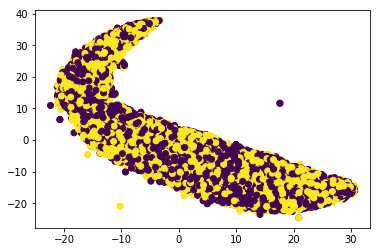

In [53]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=imdb_label.values.reshape(-1,))

In [51]:
imdb_label.values.reshape(-1,)

array([1, 0, 0, ..., 0, 1, 0])

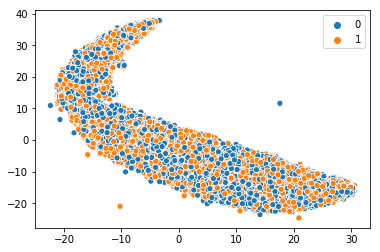

In [52]:
sns.scatterplot(tsne_result[:, 0], tsne_result[:, 1], hue=imdb_label.values.reshape(-1,))